<a href="https://colab.research.google.com/github/yashikaPilania23/DataScienceEcosystem/blob/main/pneumonia_model_keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow keras matplotlib scikit-learn


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp /content/drive/MyDrive/pneumonia_images.zip /content/


In [5]:
!unzip /content/pneumonia_images.zip -d /content/pneumonia_data


Streaming output truncated to the last 5000 lines.
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/pneumonia_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/pneumonia_d

In [6]:
import os

# List contents of the data directory
print("Data directory contents:")
for root, dirs, files in os.walk('/content/pneumonia_data'):
    print(root, dirs, files)


Data directory contents:
/content/pneumonia_data ['chest_xray'] []
/content/pneumonia_data/chest_xray ['test', '__MACOSX', 'val', 'chest_xray', 'train'] []
/content/pneumonia_data/chest_xray/test ['NORMAL', 'PNEUMONIA'] []
/content/pneumonia_data/chest_xray/test/NORMAL [] ['NORMAL2-IM-0210-0001.jpeg', 'NORMAL2-IM-0294-0001.jpeg', 'NORMAL2-IM-0347-0001.jpeg', 'NORMAL2-IM-0027-0001.jpeg', 'NORMAL2-IM-0374-0001-0001.jpeg', 'IM-0065-0001.jpeg', 'NORMAL2-IM-0309-0001.jpeg', 'IM-0086-0001.jpeg', 'NORMAL2-IM-0107-0001.jpeg', 'IM-0061-0001.jpeg', 'IM-0070-0001.jpeg', 'IM-0099-0001.jpeg', 'NORMAL2-IM-0353-0001.jpeg', 'NORMAL2-IM-0111-0001.jpeg', 'IM-0025-0001.jpeg', 'NORMAL2-IM-0381-0001.jpeg', 'IM-0017-0001.jpeg', 'IM-0071-0001.jpeg', 'NORMAL2-IM-0256-0001.jpeg', 'NORMAL2-IM-0199-0001.jpeg', 'IM-0097-0001.jpeg', 'IM-0079-0001.jpeg', 'NORMAL2-IM-0346-0001.jpeg', 'NORMAL2-IM-0129-0001.jpeg', 'NORMAL2-IM-0051-0001.jpeg', 'NORMAL2-IM-0376-0001.jpeg', 'NORMAL2-IM-0019-0001.jpeg', 'NORMAL2-IM-0246-0

In [7]:
import os
import shutil

# Define the source and destination directories
src_dir = '/content/pneumonia_data'
train_dir = os.path.join(src_dir, 'train')
val_dir = os.path.join(src_dir, 'val')

# Create directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Assuming images are all in one directory, move them to train/ and val/ directories
images = [f for f in os.listdir(src_dir) if f.endswith('.jpg') or f.endswith('.png')]
num_images = len(images)
split_index = int(num_images * 0.8)  # 80% for training and 20% for validation

# Shuffle and split images
import random
random.shuffle(images)

# Move images to train and val directories
for i, image in enumerate(images):
    src_path = os.path.join(src_dir, image)
    if i < split_index:
        dest_dir = os.path.join(train_dir, 'NORMAL')  # or PNEUMONIA if applicable
    else:
        dest_dir = os.path.join(val_dir, 'NORMAL')  # or PNEUMONIA if applicable

    os.makedirs(dest_dir, exist_ok=True)
    shutil.move(src_path, os.path.join(dest_dir, image))


In [8]:
import os

for root, dirs, files in os.walk('/content/pneumonia_data'):
    print(root, dirs, len(files))  # Print directories and number of files in each


/content/pneumonia_data ['val', 'chest_xray', 'train'] 0
/content/pneumonia_data/val [] 0
/content/pneumonia_data/chest_xray ['test', '__MACOSX', 'val', 'chest_xray', 'train'] 0
/content/pneumonia_data/chest_xray/test ['NORMAL', 'PNEUMONIA'] 0
/content/pneumonia_data/chest_xray/test/NORMAL [] 234
/content/pneumonia_data/chest_xray/test/PNEUMONIA [] 390
/content/pneumonia_data/chest_xray/__MACOSX ['chest_xray'] 1
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray ['test', 'val', 'train'] 3
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/test ['NORMAL', 'PNEUMONIA'] 3
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/test/NORMAL [] 234
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA [] 390
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/val ['NORMAL', 'PNEUMONIA'] 1
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/val/NORMAL [] 9
/content/pneumonia_data/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA [] 9
/content/pneumonia_data/chest_xray/

In [9]:
import os

# List contents of the unzipped directory
def list_directory_contents(base_dir):
    for root, dirs, files in os.walk(base_dir):
        print(f"Root: {root}")
        for file in files:
            print(f"File: {file}")

list_directory_contents('/content/pneumonia_data')


Streaming output truncated to the last 5000 lines.
File: NORMAL2-IM-1016-0001.jpeg
File: IM-0347-0001.jpeg
File: NORMAL2-IM-0836-0001.jpeg
File: IM-0379-0001.jpeg
File: NORMAL2-IM-0661-0001.jpeg
File: NORMAL2-IM-0448-0001.jpeg
File: IM-0671-0001.jpeg
File: IM-0753-0001.jpeg
File: IM-0129-0001.jpeg
File: NORMAL2-IM-1269-0001.jpeg
File: NORMAL2-IM-1214-0001.jpeg
File: NORMAL2-IM-1356-0001.jpeg
File: IM-0652-0001-0002.jpeg
File: NORMAL2-IM-0648-0001.jpeg
File: NORMAL2-IM-1303-0001.jpeg
File: NORMAL2-IM-1201-0001.jpeg
File: IM-0433-0001.jpeg
File: IM-0516-0001.jpeg
File: NORMAL2-IM-0814-0001.jpeg
File: IM-0608-0001-0002.jpeg
File: NORMAL2-IM-1396-0001.jpeg
File: NORMAL2-IM-1294-0001-0001.jpeg
File: NORMAL2-IM-1043-0001.jpeg
File: NORMAL2-IM-1291-0001.jpeg
File: NORMAL2-IM-1053-0001.jpeg
File: NORMAL2-IM-1198-0001.jpeg
File: NORMAL2-IM-1236-0001.jpeg
File: IM-0695-0001.jpeg
File: IM-0481-0001.jpeg
File: NORMAL2-IM-0409-0001.jpeg
File: IM-0164-0001.jpeg
File: IM-0463-0001.jpeg
File: IM-0682-

In [12]:
import os
from sklearn.model_selection import train_test_split

dataset_dir = 'path_to_your_dataset'

# List all files in the dataset directory
all_files = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Check if files are being correctly listed
print(f'Number of files: {len(all_files)}')
print('Sample files:', all_files[:10] if len(all_files) > 0 else 'No files available')

# Ensure all_files is not empty before splitting
if len(all_files) > 0:
    train_files, val_files = train_test_split(all_files, test_size=0.2, random_state=42)
    print(f'Train files: {len(train_files)}')
    print(f'Validation files: {len(val_files)}')
else:
    print("No files available to split.")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset'

In [13]:
import os

# List all files and directories in the base directory
def list_directory_contents(base_dir):
    for root, dirs, files in os.walk(base_dir):
        print(f"Root: {root}")
        print(f"Directories: {dirs}")
        print(f"Files: {files}")

list_directory_contents('/content/pneumonia_data')


Root: /content/pneumonia_data
Directories: ['val', 'chest_xray', 'train']
Files: []
Root: /content/pneumonia_data/val
Directories: ['NORMAL', 'PNEUMONIA']
Files: []
Root: /content/pneumonia_data/val/NORMAL
Directories: []
Files: []
Root: /content/pneumonia_data/val/PNEUMONIA
Directories: []
Files: []
Root: /content/pneumonia_data/chest_xray
Directories: ['test', '__MACOSX', 'val', 'chest_xray', 'train']
Files: []
Root: /content/pneumonia_data/chest_xray/test
Directories: ['NORMAL', 'PNEUMONIA']
Files: []
Root: /content/pneumonia_data/chest_xray/test/NORMAL
Directories: []
Files: ['NORMAL2-IM-0210-0001.jpeg', 'NORMAL2-IM-0294-0001.jpeg', 'NORMAL2-IM-0347-0001.jpeg', 'NORMAL2-IM-0027-0001.jpeg', 'NORMAL2-IM-0374-0001-0001.jpeg', 'IM-0065-0001.jpeg', 'NORMAL2-IM-0309-0001.jpeg', 'IM-0086-0001.jpeg', 'NORMAL2-IM-0107-0001.jpeg', 'IM-0061-0001.jpeg', 'IM-0070-0001.jpeg', 'IM-0099-0001.jpeg', 'NORMAL2-IM-0353-0001.jpeg', 'NORMAL2-IM-0111-0001.jpeg', 'IM-0025-0001.jpeg', 'NORMAL2-IM-0381-0001

In [14]:
import os

def delete_metadata_files(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.startswith('._'):
                os.remove(os.path.join(root, file))
                print(f"Deleted: {os.path.join(root, file)}")

delete_metadata_files('/content/pneumonia_data')


Streaming output truncated to the last 5000 lines.
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0752-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0723-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0421-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0587-0001-0002.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1348-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0642-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1327-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0649-0001.jpeg
Deleted: /content/pneumonia_data/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0486-0001.jpeg
Deleted: /content/pneum

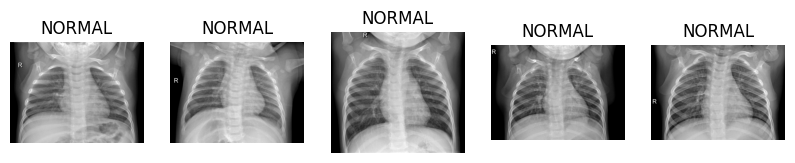

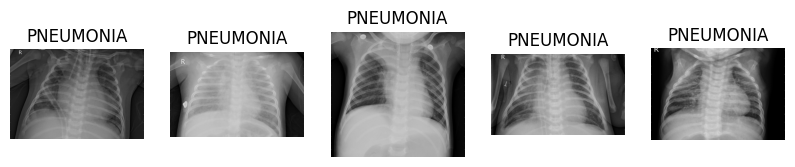

In [15]:
import matplotlib.pyplot as plt
import cv2
import os

def visualize_samples(base_dir, num_samples=5):
    for category in os.listdir(base_dir):
        category_dir = os.path.join(base_dir, category)
        if os.path.isdir(category_dir):
            images = os.listdir(category_dir)
            sample_images = images[:num_samples]

            plt.figure(figsize=(10, 5))
            for i, image_name in enumerate(sample_images):
                image_path = os.path.join(category_dir, image_name)
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img)
                plt.title(category)
                plt.axis('off')
            plt.show()

# Example usage
visualize_samples('/content/pneumonia_data/chest_xray/chest_xray/train')


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/pneumonia_data/chest_xray/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/pneumonia_data/chest_xray/chest_xray/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.7501 - loss: 0.5282 - val_accuracy: 0.6250 - val_loss: 1.1694
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.1694
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.8334 - loss: 0.3592 - val_accuracy: 0.6250 - val_loss: 0.9020
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9020
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.8651 - loss: 0.3002 - val_accuracy: 0.6875 - val_loss: 0.5922
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5922
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.8769 - loss: 0.2736 - val_accuracy: 0.7500 - val_loss: 0.6517
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6517
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.8732 - loss: 

In [20]:
test_generator = validation_datagen.flow_from_directory(
    '/content/pneumonia_data/chest_xray/chest_xray/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 905ms/step - accuracy: 0.8285 - loss: 0.4291
Test Accuracy: 0.8253


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 823ms/step
              precision    recall  f1-score   support

      NORMAL       0.34      0.19      0.25       234
   PNEUMONIA       0.62      0.77      0.69       390

    accuracy                           0.56       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.51      0.56      0.52       624



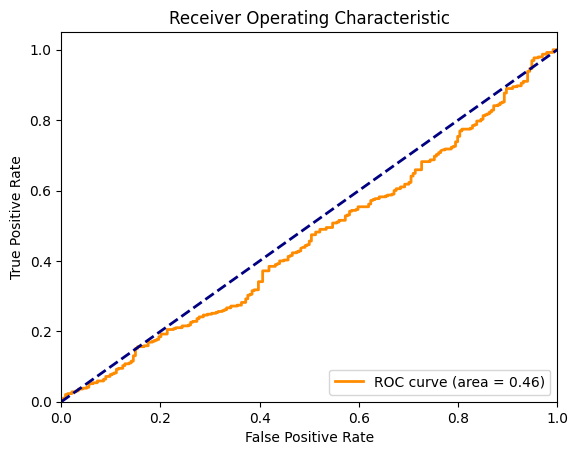

In [21]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)

print(classification_report(y_true, y_pred_classes, target_names=['NORMAL', 'PNEUMONIA']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
model.save('pneumonia_model.keras')


In [27]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import io

# Assuming your model is already loaded in the variable `model`
# For example:
# model = tf.keras.models.load_model('pneumonia_model.keras')

# Function to preprocess the uploaded image
def preprocess_image(image):
    size = (150, 150)  # Assuming your model input size is 150x150
    image = Image.open(image).convert('RGB')  # Convert the image to RGB
    image = ImageOps.fit(image, size, method=Image.LANCZOS)  # Resize image using LANCZOS
    img_array = np.asarray(image) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict using the loaded model
def predict_image(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    result = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
    return result

# Upload an image
uploaded = files.upload()

# Make predictions on the uploaded image
for image_name in uploaded.keys():
    print(f"Processing image: {image_name}")
    result = predict_image(io.BytesIO(uploaded[image_name]))
    print(f"Prediction: {result}")


Saving paediatric pneumonia.jpg to paediatric pneumonia (2).jpg
Processing image: paediatric pneumonia (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Prediction: Pneumonia
